<a href="https://colab.research.google.com/github/mervedin/coursera_projects/blob/master/Dry_Beans_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Data Exploration project by me and mentored by Merve Din.

Data Source: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#<br>

Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.


Attribute Information:

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries. <br>
2.) Perimeter (P): Bean circumference is defined as the length of its border. <br>
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.<br>
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.<br>
5.) Aspect ratio (K): Defines the relationship between L and l.<br>
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.<br>
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.<br>
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.<br>
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.<br>
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.<br>
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)<br>
12.)Compactness (CO): Measures the roundness of an object: Ed/L<br>
13-16.)ShapeFactor1-4 (SF1-4)<br>
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



In [ ]:
#Here I am importing the libraries.

#Pandas is to work with csv tables. 
#Numpy with arrays, and it's a faster tool to work with tables as well. 
#Matplotlib an seaborn are for the viz. I don't really know them yet, but let's see.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading my dataset from the Drive
beans = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dry_Bean_Dataset.xlsx')
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
beans.shape

(13611, 17)

The dataset consists of 17 columns, 13611 rows

In [ ]:
beans.info()
#data has no null values, no manipulations are needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
beans =beans.rename(columns={'roundness':'Roundness'}, inplace=False)

In [ ]:
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
#looking for duplicates
beans.duplicated().sum()

68

In [ ]:
#doesn't look like duplicates to me? I have no idea why it says so
beans[beans.sort_values(by=['Area']).duplicated()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7277,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [ ]:
beans.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


In [ ]:
beans.skew()

Area               2.952931
Perimeter          1.626124
MajorAxisLength    1.357815
MinorAxisLength    2.238211
AspectRation       0.582573
Eccentricity      -1.062824
ConvexArea         2.941821
EquivDiameter      1.948958
Extent            -0.895348
Solidity          -2.550093
roundness         -0.635749
Compactness        0.037115
ShapeFactor1      -0.534141
ShapeFactor2       0.301226
ShapeFactor3       0.242481
ShapeFactor4      -2.759483
dtype: float64

Probably Area and MinorAxisLenght are the most right skewed, and Solidity with Shape factor has more values on the left??

In [ ]:
beans.kurt()

Area               10.800814
Perimeter           3.588123
MajorAxisLength     2.531902
MinorAxisLength     6.651067
AspectRation        0.113814
Eccentricity        1.387456
ConvexArea         10.743640
EquivDiameter       5.192057
Extent              0.643319
Solidity           12.799621
Roundness           0.374306
Compactness        -0.223459
ShapeFactor1        0.714355
ShapeFactor2       -0.859254
ShapeFactor3       -0.144475
ShapeFactor4       13.038067
dtype: float64

From what I read  Fisher’s definition of kurtosis  shows us where is the peak.
So..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


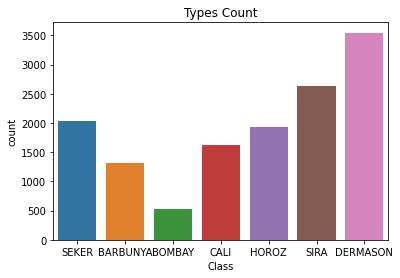

In [ ]:
#plotting number of the beans examples for each of the classes
plt.figure(figsize=(10, 5))
sns.countplot(beans['Class'])
plt.title('Types Count')


BOMBAY class in underepresented and there might be too much of DERMASON?

Initial step is done. <br>
Renamed 1 columns <br>
We found no duplicates, no missing values. <br>
Data types are right <br>



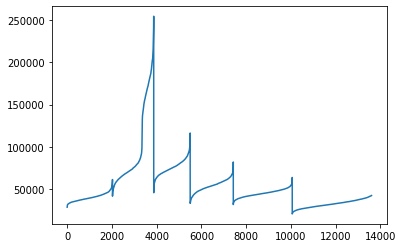

In [ ]:
plt.plot(beans['Area'])

In [ ]:
beans.groupby('Class').count()['Area'].plot